# Introduction
The following notebook demonstrates the following:  
* [X] Train OLS model
* [X] Validate assumptions for OLS

**NOTE**: The purpose of this notebook is to quickly refer to this set for specific validations and visualizations. It does not bother to do a train/test split. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from src.utils import import_dataset, get_column_by_type

In [2]:
dat = import_dataset()

In [3]:
# get all numeric columns
dat = get_column_by_type(dat, object, exclude=True)
dat.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [4]:
y = dat['mpg']
X = dat.loc[:, dat.columns != 'mpg']

# Using sklearn's LinearRegression model

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
print(model.coef_)

[-3.29859089e-01  7.67843024e-03 -3.91355574e-04 -6.79461791e-03
  8.52732469e-02  7.53367180e-01]


In [7]:
from src.linear_models import *

In [8]:
y_pred = model.predict(X)

# Validated model performance

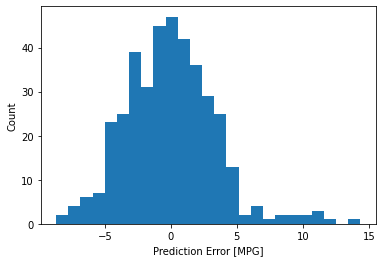

In [10]:
plot_error_distribution(y, y_pred)

# Validate assumptions
### Assumption 1: Normality in error distribution

Error does not satisfy normality assumption


/home/victoryjin99/miniconda3/envs/uci_autompg/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


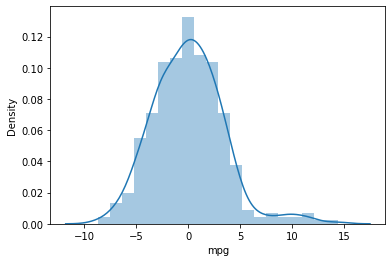

In [11]:
check_normal_errors(y, y_pred)

### Assumption 2: No Multicollinearity

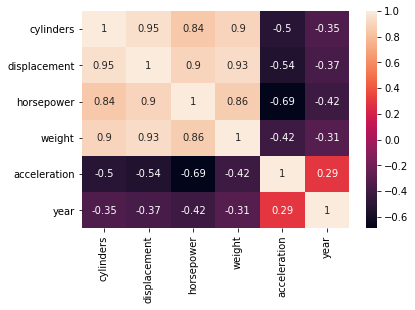

cylinders: 115.97777160980726
displacement: 86.48595590611876
horsepower: 60.25657462146676
weight: 137.4717563697324
acceleration: 69.40087667701684
year: 109.3200159587966

dropping 'weight' at index: 3
dropping 'cylinders' at index: 0
Remaining variables:
Index(['displacement', 'horsepower', 'acceleration', 'year'], dtype='object')


,displacement,horsepower,acceleration,year
0,307.0,130.0,12.0,70
1,350.0,165.0,11.5,70
2,318.0,150.0,11.0,70
3,304.0,150.0,12.0,70
4,302.0,140.0,10.5,70


In [12]:
X_vif_filtered = check_multicollinearity(model, X, y)
X_vif_filtered.head()

### Assumption 3: No autocorrelation

In [13]:
check_autocorrelation(y, y_pred)

Durbin-Watson: 1.2318834242780365
Positive autocorrelation


### Assumption 4: No Heteroscedasticity

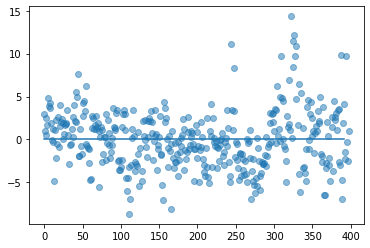

In [15]:
check_homoscedasticity(y, y_pred)

### Assumption 5: Linearity between target and features

Mean Squared Error from model is 11.590170981415227


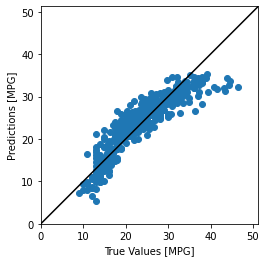

In [9]:
plot_prediction_comparison(y, model.predict(X))